# Load the library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv('/content/HousePrices.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

# EDA

In [ ]:
data.describe()

Id   Dwell_Type  LotFrontage        LotArea  OverallQual  \
count  2073.000000  2073.000000  1753.000000    2073.000000  2073.000000   
mean    916.132176    60.556199    72.056475   10717.853353     6.233478   
std     493.014670   159.924810    27.987475    9215.982306     1.517115   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     519.000000    20.000000    60.000000    7620.000000     5.000000   
50%     932.000000    50.000000    70.000000    9492.000000     6.000000   
75%    1302.000000    70.000000    83.000000   11601.000000     7.000000   
max    1820.000000  7080.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  2073.000000  2073.000000   2073.000000  2059.000000  2073.000000  ...   
mean      5.835022  1969.445731   1986.617463   101.875668   437.949349  ...   
std       1.360214    30.222647     20.432694   179.169217   448.051119  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1950.000000   1970.000000     0.000000     0.000000  ...   
50%       5.000000  1971.000000   1995.000000     0.000000   381.000000  ...   
75%       7.000000  1999.000000   2004.000000   161.500000   708.000000  ...   
max       9.000000  2010.000000   2023.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  2073.000000  2073.000000    2073.000000  2073.000000  2073.000000   
mean     94.168837    46.035697      21.029908     2.979257    14.552340   
std     129.072113    64.768713      59.569928    26.817218    54.099626   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     168.000000    67.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold  \
count  2073.000000   2073.000000  2073.000000  2073.000000   
mean      2.299083     39.736614     6.287506  2007.851905   
std      37.411031    429.819512     2.690130     1.329705   
min       0.000000      0.000000     1.000000  2006.000000   
25%       0.000000      0.000000     5.000000  2007.000000   
50%       0.000000      0.000000     6.000000  2008.000000   
75%       0.000000      0.000000     8.000000  2009.000000   
max     738.000000  15500.000000    12.000000  2010.000000   

       Property_Sale_Price  
count          2073.000000  
mean         180967.284129  
std           78666.411112  
min           34900.000000  
25%          130000.000000  
50%          163990.000000  
75%          214000.000000  
max          755000.000000  

[8 rows x 38 columns]

In [ ]:
missing_values=data.isnull().sum()
missing_values

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

<Axes: >

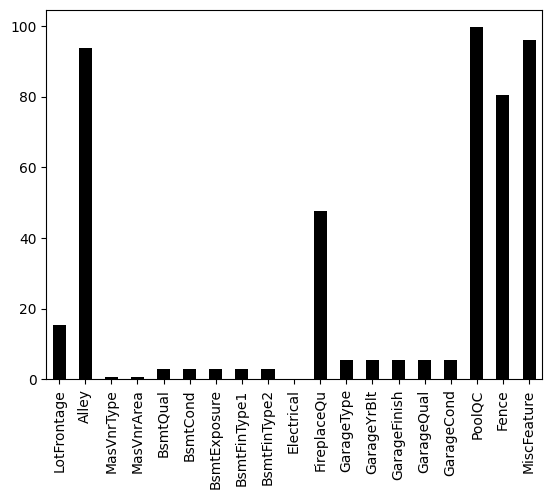

In [ ]:
missing_percentage = ((data.isnull().sum())/len(data)*100)
missing_percentage = missing_percentage[missing_percentage>0]
missing_percentage.plot(kind='bar',color='black')

In [ ]:
missing_percentage.sort_values(ascending = False)

PoolQC          99.614086
MiscFeature     96.140859
Alley           93.777135
Fence           80.511336
FireplaceQu     47.660396
LotFrontage     15.436565
GarageType       5.451037
GarageYrBlt      5.451037
GarageFinish     5.451037
GarageQual       5.451037
GarageCond       5.451037
BsmtExposure     2.942595
BsmtFinType2     2.894356
BsmtFinType1     2.846117
BsmtCond         2.846117
BsmtQual         2.846117
MasVnrArea       0.675350
MasVnrType       0.675350
Electrical       0.048239
dtype: float64

In [ ]:
data.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

# Data prepration

In [ ]:
numeric_columns = data.select_dtypes(include='number').columns
numeric_columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [ ]:
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

<ipython-input-14-129c9cd6c5d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

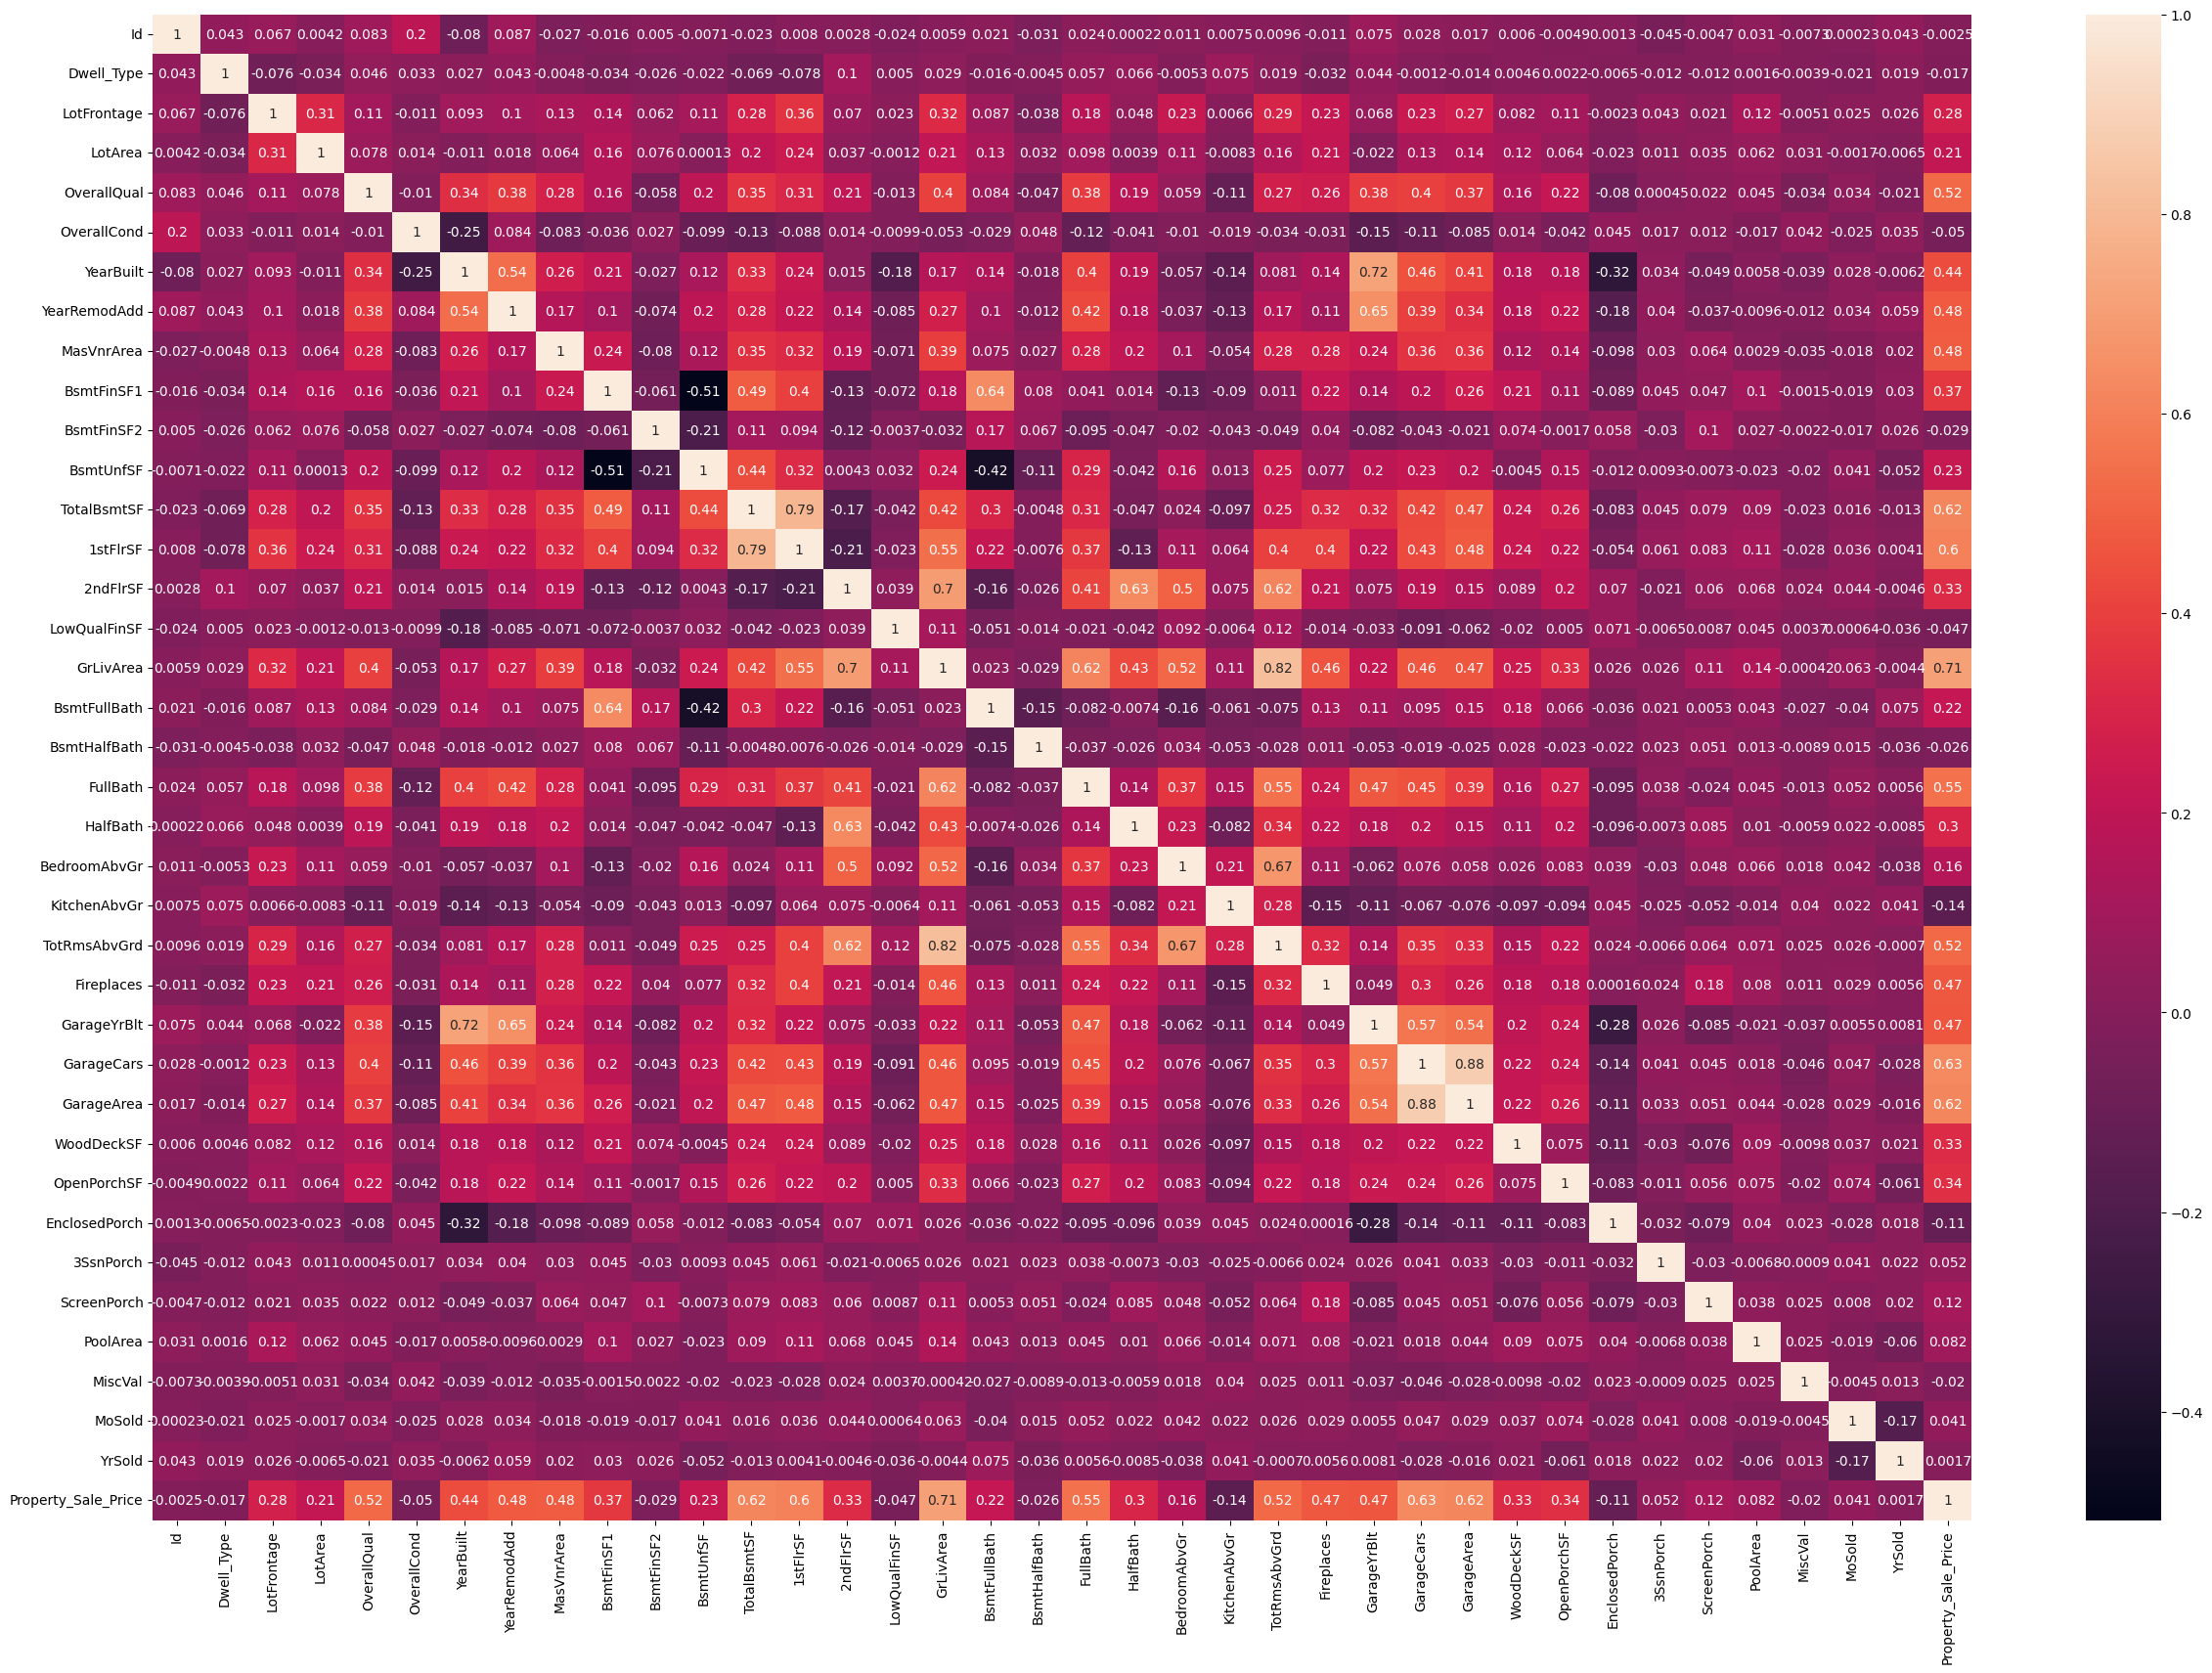

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

In [ ]:
def display_low_correlation_with_target(data, target_column, threshold=0.3):

    # Calculate correlations
    correlations = data.corr()[target_column]

    # Filter columns based on the threshold
    low_corr_columns = correlations[(correlations < threshold) & (correlations > -threshold)].index.tolist()

    # Display the columns
    print(f"Columns with correlation less than {threshold} and greater than {-threshold} with the target column '{target_column}':")
    print(low_corr_columns)

    return low_corr_columns

low_corr_columns = display_low_correlation_with_target(data, 'Property_Sale_Price', threshold=0.2)


Columns with correlation less than 0.2 and greater than -0.2 with the target column 'Property_Sale_Price':
['Id', 'Dwell_Type', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


<ipython-input-15-8a74e2ce7583>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()[target_column]


In [ ]:
def corr_with_column(data,target_col,columns_of_interest):
    correlations = data[columns_of_interest].corrwith(data[target_col])
    print(f"correlation for {'target_col'} and specified columns")
    return correlations

In [ ]:
corr_with_column(data,'Property_Sale_Price',low_corr_columns)

correlation for target_col and specified columns


Id              -0.002491
Dwell_Type      -0.017399
OverallCond     -0.049926
BsmtFinSF2      -0.029042
LowQualFinSF    -0.046975
BsmtHalfBath    -0.026010
BedroomAbvGr     0.160748
KitchenAbvGr    -0.144456
EnclosedPorch   -0.108530
3SsnPorch        0.052394
ScreenPorch      0.115157
PoolArea         0.081913
MiscVal         -0.020430
MoSold           0.041053
YrSold           0.001740
dtype: float64

In [ ]:
data.drop(['Id','Dwell_Type','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch',
          'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'],axis=1,inplace=True)

In [ ]:
len(data.columns)

62

#Encoding

In [ ]:
column_with_null_values = data[data.columns[data.isnull().any()].tolist()].dtypes

In [ ]:
column_with_null_values

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [ ]:
def replace_null_values(df):
    for column in df.columns[df.isnull().any()]:
        if df[column].dtype =='object':
            mode = df[column].mode().iloc[0]
            df[column].fillna(mode,inplace=True)
        elif df[column].dtype=='float':
            median = df[column].median()
            df[column].fillna(median,inplace=True)
    return df


In [ ]:
replace_null_values(data)

Zone_Class  LotFrontage  LotArea Road_Type Property_Shape LandContour  \
0            RL         65.0     8450      Pave            Reg         Lvl   
1            RL         80.0     9600      Pave            Reg         Lvl   
2            RL         68.0    11250      Pave            IR1         Lvl   
3            RL         60.0     9550      Pave            IR1         Lvl   
4            RL         84.0    14260      Pave            IR1         Lvl   
...         ...          ...      ...       ...            ...         ...   
2068         RL         70.0     8755      Pave            IR1         Lvl   
2069         RL         63.0     7711      Pave            IR1         Lvl   
2070         RL        313.0    25000      Pave            Reg         Low   
2071         RL         52.0    14375      Pave            IR1         Lvl   
2072         RM         98.0     8820      Pave            Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood  ... GarageCars GarageArea  \
0       AllPub    Inside       Gtl      CollgCr  ...          2        548   
1       AllPub       FR2       Gtl      Veenker  ...          2        460   
2       AllPub    Inside       Gtl      CollgCr  ...          2        608   
3       AllPub    Corner       Gtl      Crawfor  ...          3        642   
4       AllPub       FR2       Gtl      NoRidge  ...          3        836   
...        ...       ...       ...          ...  ...        ...        ...   
2068    AllPub       FR2       Gtl      Gilbert  ...          2        390   
2069    AllPub    Inside       Gtl      Edwards  ...          0          0   
2070    AllPub    Inside       Gtl      Mitchel  ...          2        576   
2071    NoSeWa   CulDSac       Gtl       Timber  ...          2        525   
2072    AllPub    Corner       Gtl      OldTown  ...          2        456   

     GarageQual GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF SaleType  \
0            TA         TA           Y           0           61       WD   
1            TA         TA           Y         298            0       WD   
2            TA         TA           Y           0           42       WD   
3            TA         TA           Y           0           35       WD   
4            TA         TA           Y         192           84       WD   
...         ...        ...         ...         ...          ...      ...   
2068         TA         TA           Y           0            0       WD   
2069         TA         TA           N         321            0      Oth   
2070         TA         TA           P           0            0       WD   
2071         TA         TA           Y           0          118      COD   
2072         TA         TA           Y          48            0       WD   

     SaleCondition Property_Sale_Price  
0           Normal              208500  
1           Normal              181500  
2           Normal              223500  
3          Abnorml              140000  
4           Normal              250000  
...            ...                 ...  
2068        Normal              214000  
2069       Abnorml              150000  
2070        Normal              143000  
2071       Abnorml              137500  
2072        Normal              124900  

[2073 rows x 62 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

for column in data.columns:
    if data[column].dtype=='object':
        data[column] = le.fit_transform(data[column])


In [ ]:
data.dtypes

Zone_Class               int64
LotFrontage            float64
LotArea                  int64
Road_Type                int64
Property_Shape           int64
                        ...   
WoodDeckSF               int64
OpenPorchSF              int64
SaleType                 int64
SaleCondition            int64
Property_Sale_Price      int64
Length: 62, dtype: object

# split the data

In [ ]:
x = data.drop(['Property_Sale_Price'],axis=1)
y = data['Property_Sale_Price']

In [ ]:
x.shape

(2073, 61)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1658, 61)
(1658,)
(415, 61)
(415,)


# linear regression

In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print(lr.coef_)

[-1.67494151e+03 -1.29206713e+02  1.93041376e-01  3.37793446e+04
 -1.36952302e+03  2.85320202e+03 -3.52375928e+04  7.57989040e+02
  1.10478125e+04  4.39071247e+02 -6.79281865e+02 -1.11194082e+04
 -5.45931552e+03 -1.20672998e+03  2.14123731e+03  1.76866361e+01
  2.09256320e+02  2.13185912e+03  6.77143311e+03 -1.78449870e+03
  1.30127142e+03  4.44166162e+03  3.92481642e+01 -1.18551184e+04
  1.31509364e+03  1.44630743e+03 -1.05830531e+04  2.03732357e+03
 -3.95657202e+03 -1.02863912e+03 -7.72757816e+00  1.61235248e+03
 -1.23022590e+01  2.53119423e+01 -4.10245735e+03 -1.47133407e+03
  8.18696771e+03  7.70259336e+02  2.44426157e+01  2.60473023e+01
  1.17259827e+01  6.92511939e+03  5.22732969e+03  2.78837728e+03
 -1.02178475e+04  2.60371825e+03  5.51036306e+03  1.05584322e+04
 -1.52339395e+03 -5.77146939e+02 -9.22270646e+01 -1.99503462e+03
  1.10926762e+04  8.16222651e+00 -7.80435725e+02  5.18776030e+03
  2.91131744e+03  2.23417124e+01  5.51639983e+00 -1.36706026e+03
  4.29960946e+03]


In [ ]:
print(lr.intercept_)

-244106.1326730456


In [ ]:
y_hat_train = lr.predict(xtrain)
y_hat_test = lr.predict(xtest)

In [ ]:
y_hat_train

array([138279.3425549 , 121221.16526966, 204481.64404223, ...,
       228339.77328734, 190964.97566592, 174499.81350523])

In [ ]:
rmse_train = np.sqrt(mean_squared_error(ytrain,y_hat_train))
print(round(rmse_train,2))

30457.85


In [ ]:
rmse_test = np.sqrt(mean_squared_error(ytest,y_hat_test))
print(round(rmse_test,2))

34441.81


In [ ]:
print("r2 score of the model is:",r2_score(ytrain,y_hat_train))

r2 score of the model is: 0.8421488928232505


In [ ]:
print("r2 score of the model is:",r2_score(ytest,y_hat_test))

r2 score of the model is: 0.8399790704698389


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=4, criterion="squared_error",min_samples_split=8)
dtree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4, min_samples_split=8)

In [ ]:
y_hat_dtrain = dtree.predict(xtrain)
y_hat_dtest = dtree.predict(xtest)

In [ ]:
rmse_dtrain = np.sqrt(mean_squared_error(ytrain,y_hat_dtrain))
print(round(rmse_dtrain,2))

35236.55


In [ ]:
rmse_dtest = np.sqrt(mean_squared_error(ytest,y_hat_dtest))
print(round(rmse_dtest,2))

40589.81
